In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(42)
df = pd.DataFrame({
'age': np.random.randint(18, 70, 200),
'income': np.random.normal(50000, 15000, 200).astype(int),
'spending_score': np.random.randint(1, 100, 200),
'gender': np.random.choice(['Male', 'Female'], 200),
'region': np.random.choice(['North', 'South', 'East', 'West'], 200)
})

In [3]:
print("===== INFO =====")
print(df.info())


print("===== DESCRIBE =====")
print(df.describe(include='all'))


print("===== MISSING VALUES =====")
print(df.isnull().sum())

===== INFO =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             200 non-null    int64 
 1   income          200 non-null    int64 
 2   spending_score  200 non-null    int64 
 3   gender          200 non-null    object
 4   region          200 non-null    object
dtypes: int64(3), object(2)
memory usage: 7.9+ KB
None
===== DESCRIBE =====
              age        income  spending_score gender region
count   200.00000    200.000000      200.000000    200    200
unique        NaN           NaN             NaN      2      4
top           NaN           NaN             NaN   Male  South
freq          NaN           NaN             NaN    109     56
mean     43.42500  49990.615000       48.310000    NaN    NaN
std      14.94191  15861.517489       28.542552    NaN    NaN
min      18.00000   6808.000000        1.000000    NaN    NaN

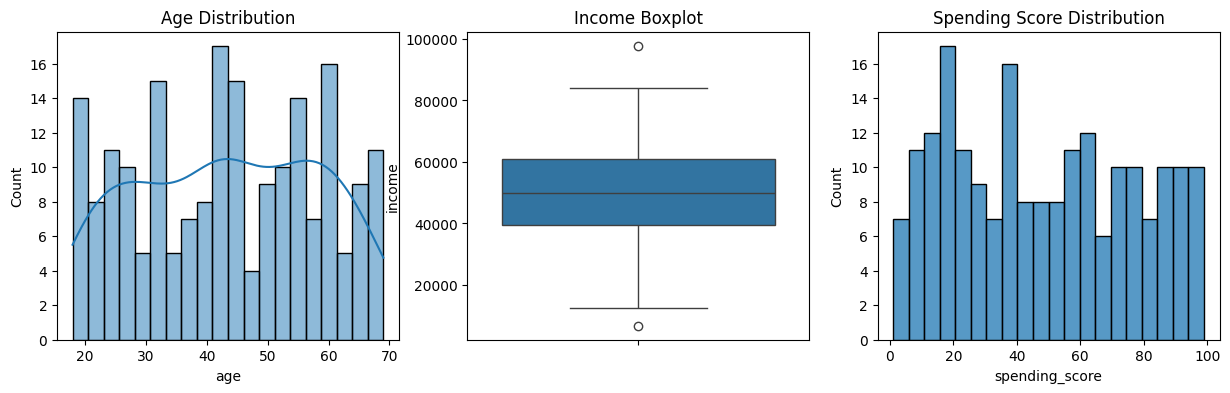

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.histplot(df['age'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')


sns.boxplot(y=df['income'], ax=axes[1])
axes[1].set_title('Income Boxplot')


sns.histplot(df['spending_score'], bins=20, ax=axes[2])
axes[2].set_title('Spending Score Distribution')


plt.show()

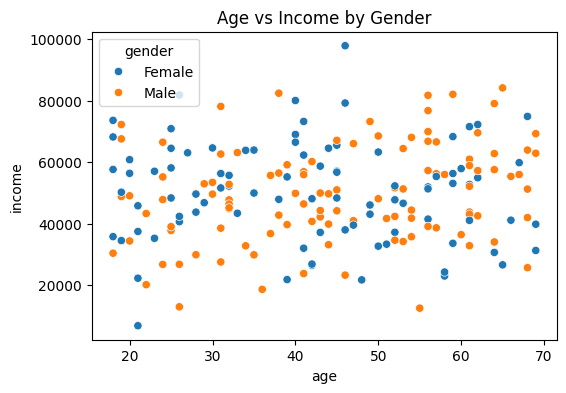

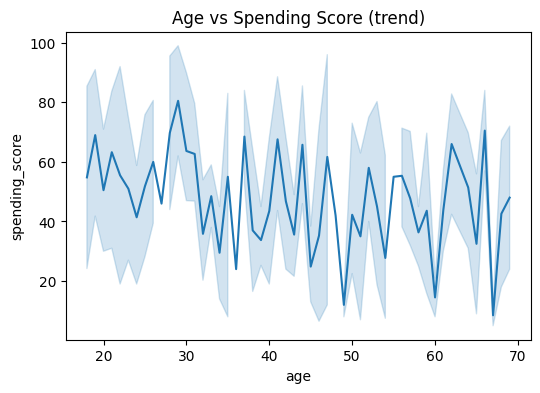

In [5]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='age', y='income', hue='gender', data=df)
plt.title('Age vs Income by Gender')
plt.show()


plt.figure(figsize=(6, 4))
sns.lineplot(x='age', y='spending_score', data=df)
plt.title('Age vs Spending Score (trend)')
plt.show()

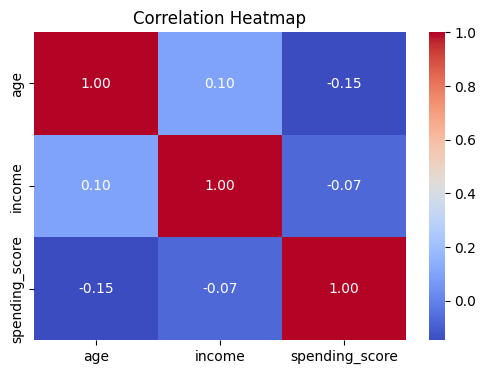

In [6]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

 Findings
- Age: Fairly uniform distribution; no obvious skew.
- Income: Appears normally distributed but with some outliers (seen in boxplot).
- Spending Score: Uniform-like, no clear skew.
- Relationship: Age negatively correlated with Spending Score (older spend less).
- Gender differences: Slight variation in Age vs Income scatter.


 Risks & Assumptions
- Synthetic dataset — real-world income may have heavier skew.
- Missing data not present here, but real data may need imputation.
- Regional effects not visualized yet.


 Implications for Next Step
1. Scale numeric variables (income highly spread).
2. Engineer categorical encodings (gender, region).
3. Handle outliers in income.


 Top 3 Insights
1. Income shows outliers → potential cleaning required.
2. Age vs Spending Score shows a downward trend → feature engineering opportunity.
3. Gender could interact with income levels → consider in modeling.


 Assumptions & Risks
- Data is representative (may not be true in real sample).
- Outliers are errors, not true high earners.
- Spending Score meaning needs domain context.
